In [1]:
# importation des librairies
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# chargement des donnees
data = pd.read_csv('data/fraude_bancaire_synthetique_final.csv')
data.head()

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
0,49.548894,183659.045784,48.228579,9.649456e+06,14.0,Mastercard,Houston,femelle,0.0
1,44.952665,329732.599158,67.573097,2.500000e+04,NaN,Mastercard,Houston,femelle,0.0
2,41.659910,75000.000000,77.559487,2.724004e+06,9.0,Visa,Houston,male,0.0
3,42.377280,75000.000000,54.282220,4.755632e+06,9.0,Mastercard,Orlando,femelle,0.0
4,48.125023,359999.482942,71.148546,2.500000e+04,8.0,Mastercard,Orlando,femelle,0.0


In [3]:
# control des lignes dupliquées
data[data.duplicated()]

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
224,39.762490,300270.525953,55.617823,6.030664e+06,4.0,Visa,Miami,femelle,0.0
278,52.300411,234712.770449,51.699459,6.260929e+06,10.0,Mastercard,Miami,male,0.0
410,38.628035,209866.923622,74.456158,7.608718e+06,16.0,Visa,Houston,femelle,0.0
441,27.162360,343992.664351,8.313368,4.704175e+06,5.0,Mastercard,Orlando,male,0.0
559,43.811441,270288.955478,56.992307,6.155166e+06,12.0,Mastercard,Houston,male,0.0
573,26.782059,292086.733800,83.714035,8.850064e+06,1.0,Visa,Houston,male,0.0
630,32.143844,146046.956642,17.235087,3.111217e+06,6.0,Visa,Miami,male,0.0
696,40.820332,254730.225991,62.256506,5.132194e+06,8.0,Mastercard,NaN,femelle,NaN
916,28.454394,107290.835037,50.523703,7.809140e+06,15.0,Visa,Orlando,male,0.0
959,45.652044,235350.569967,33.726708,4.481560e+06,3.0,Visa,Miami,femelle,0.0


In [4]:
# retrait des lignes dupliquées
data = data.drop_duplicates(keep='first')

# Previsualisation des donnees

In [5]:
data.shape

(1010, 9)

In [6]:
data.info() # presence de donnees categorielles

<class 'pandas.core.frame.DataFrame'>
Index: 1010 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  993 non-null    float64
 1   salaire              992 non-null    float64
 2   score_credit         988 non-null    float64
 3   montant_transaction  986 non-null    float64
 4   anciennete_compte    989 non-null    float64
 5   type_carte           987 non-null    object 
 6   region               994 non-null    object 
 7   genre                987 non-null    object 
 8   fraude               973 non-null    float64
dtypes: float64(6), object(3)
memory usage: 78.9+ KB


In [7]:
data.columns

Index(['age', 'salaire', 'score_credit', 'montant_transaction',
       'anciennete_compte', 'type_carte', 'region', 'genre', 'fraude'],
      dtype='object')

In [8]:
data.describe() # Presence de donnees manquantes 

,age,salaire,score_credit,montant_transaction,anciennete_compte,fraude
count,993.000000,992.000000,988.000000,9.860000e+02,989.000000,973.000000
mean,40.436815,297746.299275,49.568967,5.079337e+06,9.672396,0.046249
std,7.796388,136481.163158,19.105630,2.851735e+06,4.812460,0.210131
min,24.000000,75000.000000,3.000000,2.500000e+04,1.000000,0.000000
25%,35.243970,195324.728713,36.376504,3.115716e+06,6.000000,0.000000
50%,40.486283,295579.560933,49.422268,4.965177e+06,10.000000,0.000000
75%,45.652044,391806.523027,62.829387,6.922866e+06,13.000000,0.000000
max,60.000000,715256.040844,99.000000,1.513330e+07,25.000000,1.000000


In [9]:
# control des donnees manquantes
data.isnull().sum()

age                    17
salaire                18
score_credit           22
montant_transaction    24
anciennete_compte      21
type_carte             23
region                 16
genre                  23
fraude                 37
dtype: int64

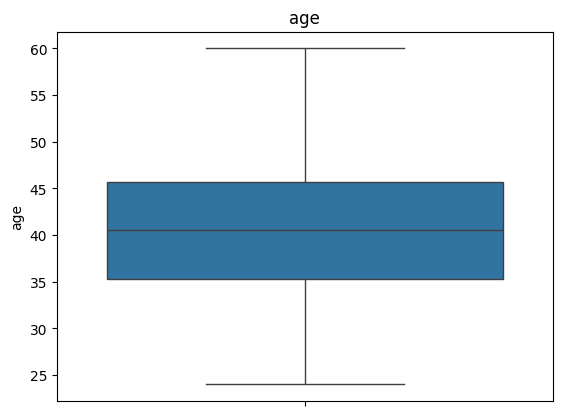

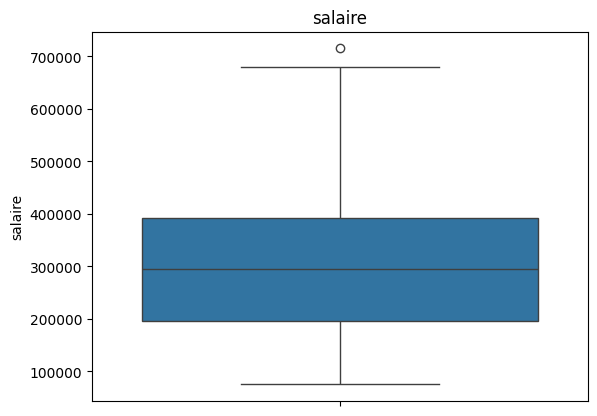

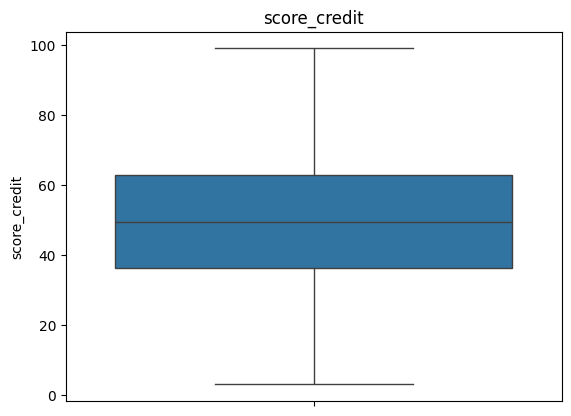

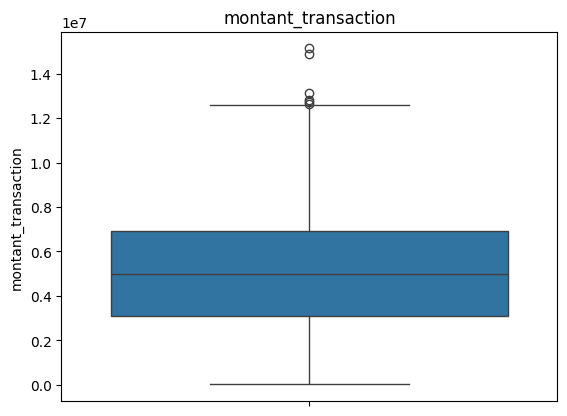

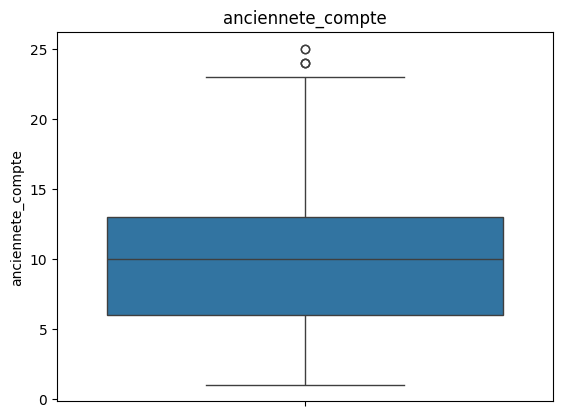

In [10]:
# control des outliers
for i in data.select_dtypes(include=[np.number]).columns.drop('fraude'):
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

# Preprocessing

## Gestion des donnees manquantes

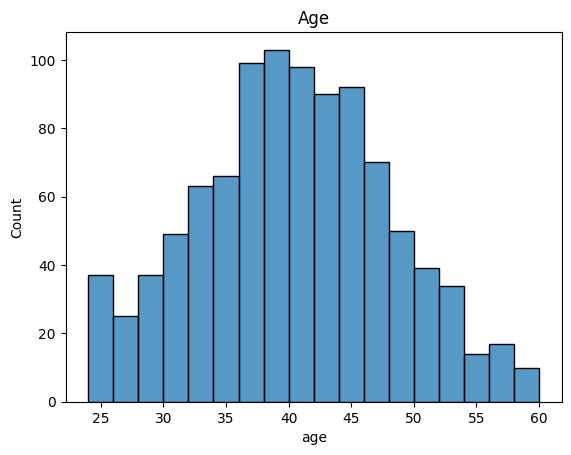

In [11]:
# Visualisation de la colonne age
sns.histplot(data['age'])
plt.title('Age')
plt.show()

In [12]:
# visualisation des lignes avec les donnees manquantes ('age')
data[data['age'].isnull()]

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
177,NaN,75000.000000,26.375977,7.114368e+06,15.0,Visa,Houston,male,0.0
242,NaN,75000.000000,NaN,4.893778e+06,15.0,Mastercard,Houston,male,0.0
269,NaN,445189.792315,22.766499,1.153188e+07,11.0,Mastercard,Houston,femelle,0.0
272,NaN,495744.403319,49.846519,2.599474e+06,17.0,Visa,Miami,male,0.0
288,NaN,265382.077185,61.763145,6.756565e+06,13.0,Mastercard,Houston,male,0.0
303,NaN,292513.465044,68.997781,6.236213e+06,13.0,Visa,Miami,femelle,0.0
408,NaN,246921.155577,61.831420,6.312118e+06,2.0,Mastercard,Miami,femelle,0.0
494,NaN,124225.304929,35.719165,4.244664e+06,7.0,Visa,Houston,male,1.0
540,NaN,138252.740006,49.143512,3.194309e+06,14.0,Visa,Orlando,NaN,0.0
577,NaN,317226.763542,49.042821,6.282128e+06,7.0,Mastercard,Orlando,male,0.0


In [13]:
# les donnees se rapprochant d'une distribution normale , je preconise le remplacement des valeurs manquantes par la moyenne
data.loc[:, 'age'] = data['age'].fillna(data['age'].mean())

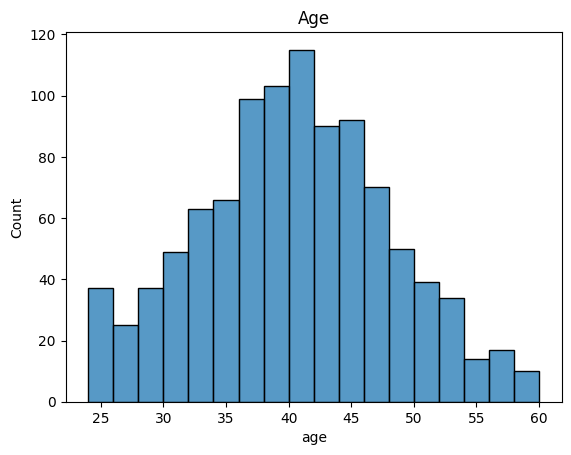

In [14]:
sns.histplot(data['age'])
plt.title('Age')
plt.show()

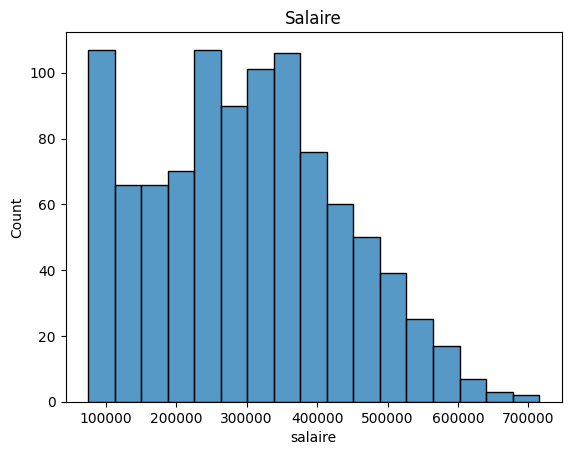

In [15]:
# gestion de la colonnees salaires
sns.histplot(data['salaire'])
plt.title('Salaire')
plt.show()

In [16]:
# visualisation des lignes avec les donnees manquantes ('salaire')
data[data['salaire'].isnull()]

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
103,44.283670,NaN,27.433169,5.870113e+06,13.0,Mastercard,Miami,NaN,0.0
153,53.954489,NaN,62.779136,2.681499e+06,NaN,Visa,Orlando,femelle,0.0
250,42.372581,NaN,46.425862,7.514042e+06,8.0,Mastercard,Miami,male,0.0
310,38.172220,NaN,60.743596,2.159052e+06,5.0,Visa,Houston,male,0.0
439,40.971689,NaN,34.106816,4.084073e+06,10.0,Mastercard,Orlando,male,0.0
464,28.622124,NaN,79.413240,4.211479e+06,8.0,Mastercard,NaN,femelle,0.0
558,46.371443,NaN,46.407393,9.451670e+06,4.0,Mastercard,Houston,male,0.0
576,32.187037,NaN,83.846260,3.802230e+06,5.0,Mastercard,Orlando,male,0.0
632,34.506141,NaN,44.808066,1.302233e+06,3.0,Visa,Miami,male,1.0
752,26.043737,NaN,36.893450,2.585745e+06,16.0,Mastercard,Orlando,male,0.0


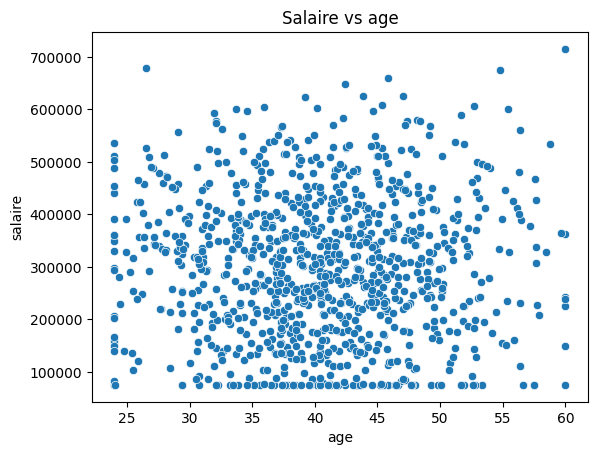

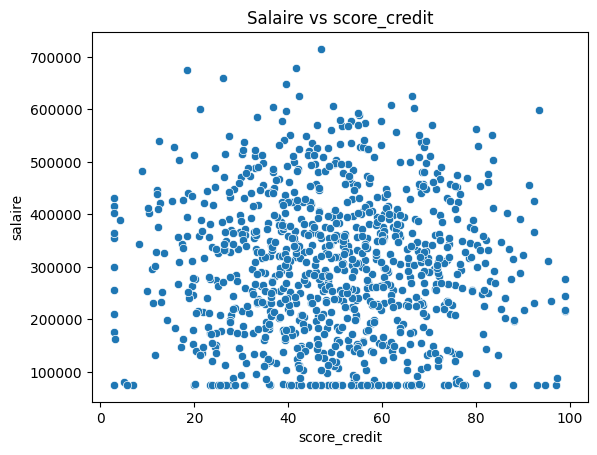

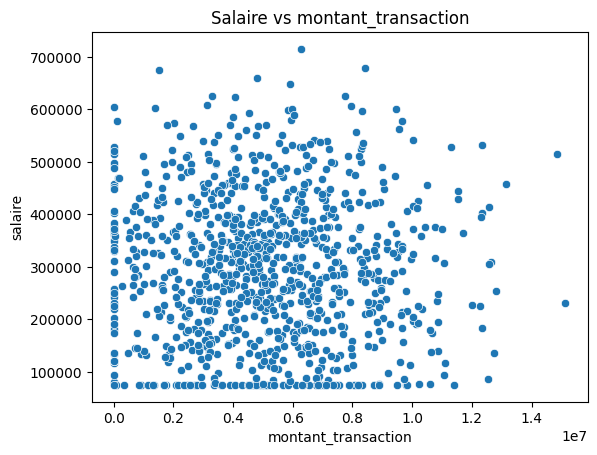

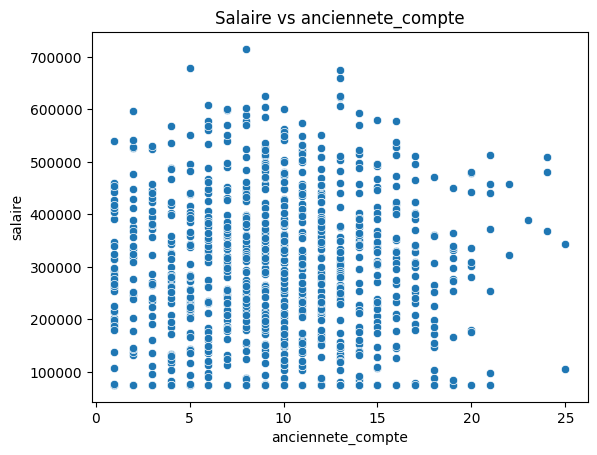

In [17]:
# controle de l'impacte des autres colonnes sur la colonne salaire
for i in data.select_dtypes(include=[np.number]).columns.drop('fraude'):
    if i != 'salaire':
        sns.scatterplot(x=data[i], y=data['salaire'])
        plt.title(f'Salaire vs {i}')
        plt.show()
# Aucunes relations significatives

In [18]:
# remplacement des donnees manquantes par la mediane (Pas de distribution normale)
data.loc[:, 'salaire'] = data['salaire'].fillna(data['salaire'].median())

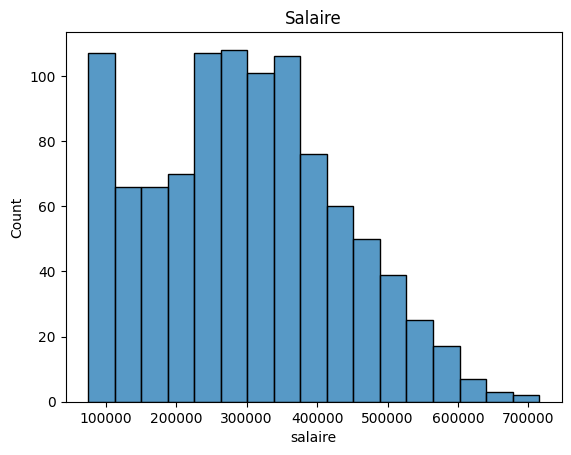

In [19]:
sns.histplot(data['salaire'])
plt.title('Salaire')
plt.show()

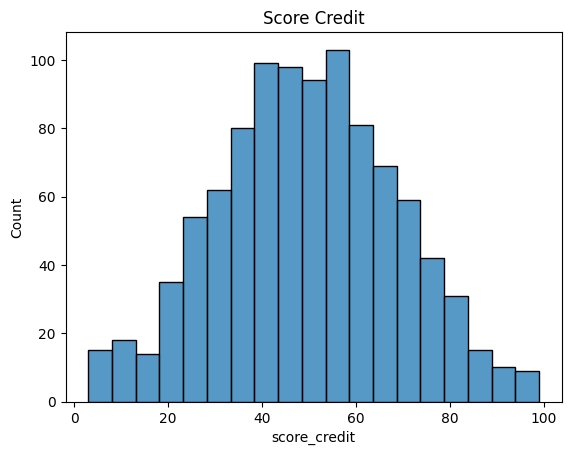

In [20]:
# gestion de la colonne score_credit
sns.histplot(data['score_credit'])
plt.title('Score Credit')
plt.show()
# se rapprochant d'une distribution normale, je preconise le remplacement des valeurs manquantes par la moyenne

In [21]:
# remplacement des valeurs manquantes par la moyenne
data.loc[:, 'score_credit'] = data['score_credit'].fillna(data['score_credit'].mean())

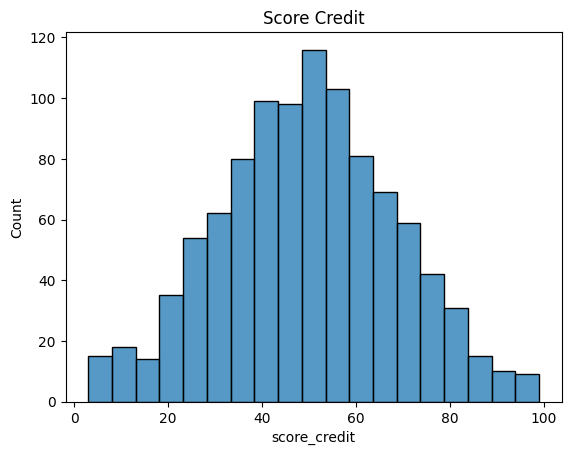

In [22]:
sns.histplot(data['score_credit'])
plt.title('Score Credit')
plt.show()

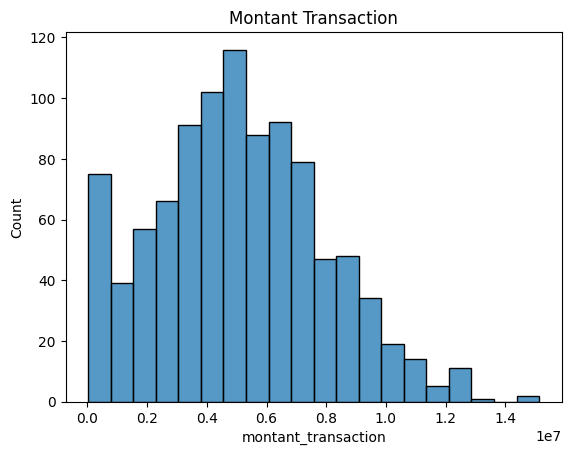

In [23]:
# control de la colonne montant_transaction
sns.histplot(data['montant_transaction'])
plt.title('Montant Transaction')
plt.show()

In [24]:
# remplacement des valeurs manquantes par la mediane
data.loc[:, 'montant_transaction'] = data['montant_transaction'].fillna(data['montant_transaction'].median())

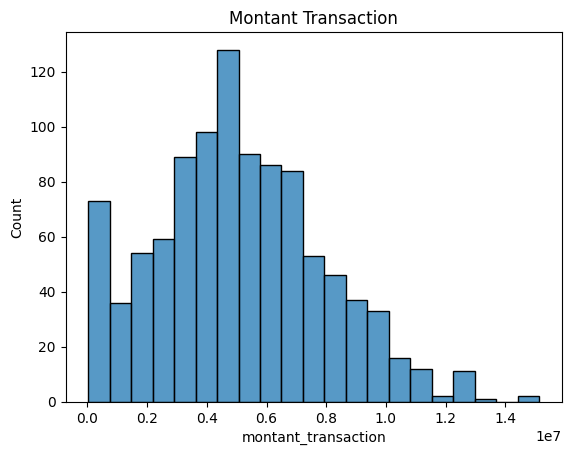

In [25]:
sns.histplot(data['montant_transaction'])
plt.title('Montant Transaction')
plt.show()

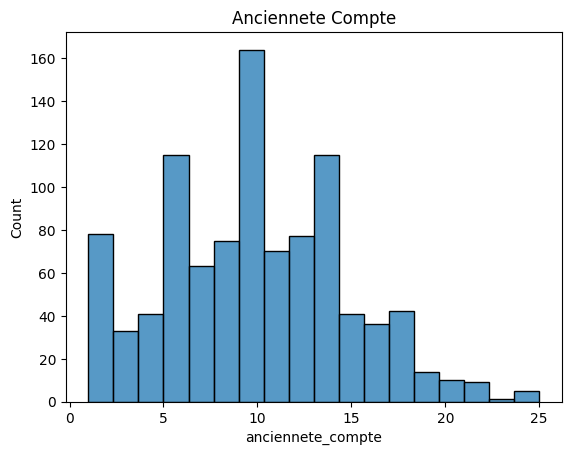

In [26]:
# control de la colonne anciennete_compte
sns.histplot(data['anciennete_compte'])
plt.title('Anciennete Compte')
plt.show()

In [27]:
# Pour eviter un trop grand ecart sur l'anciennete de 10 , je vais remplacer les valeurs manquantes par la moyenne
data.loc[:, 'anciennete_compte'] = data['anciennete_compte'].fillna(data['anciennete_compte'].mean())

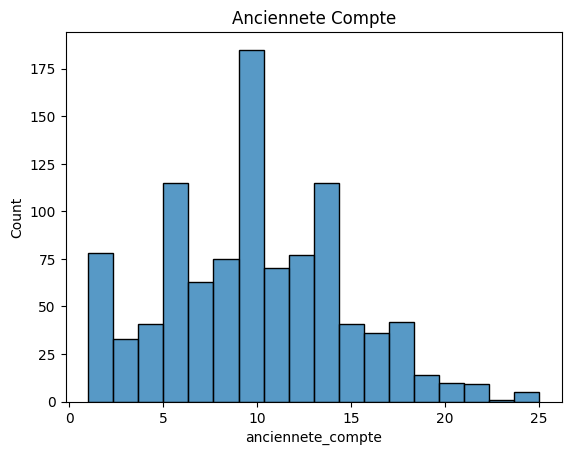

In [28]:
sns.histplot(data['anciennete_compte'])
plt.title('Anciennete Compte')
plt.show()

In [29]:
# gestion de la colonne type_carte de colonne
data['type_carte'].value_counts()

type_carte
Visa          567
Mastercard    420
Name: count, dtype: int64

In [30]:
# control des valeurs manquantes sur la colonne type_carte
data[data['type_carte'].isnull()]

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
7,47.849198,245523.666190,19.711719,4.595029e+06,7.0,NaN,Houston,male,0.0
20,40.159964,174619.461657,41.468007,1.066785e+07,11.0,NaN,Houston,femelle,0.0
31,37.703124,203726.789408,43.433581,2.416136e+06,10.0,NaN,Houston,femelle,0.0
77,46.071854,366688.799261,29.634922,4.871431e+06,11.0,NaN,Miami,male,0.0
85,42.813299,146141.490754,49.568967,2.926837e+06,10.0,NaN,Miami,male,0.0
186,49.171897,309555.353965,16.692307,3.114672e+06,9.0,NaN,Orlando,femelle,0.0
230,41.918982,327130.666722,52.928286,4.761872e+06,6.0,NaN,Orlando,femelle,0.0
271,35.243970,341250.344744,36.315156,8.777851e+06,14.0,NaN,Miami,male,0.0
349,38.213827,184377.955408,44.304089,3.777232e+06,8.0,NaN,Orlando,male,0.0
416,37.414659,568085.994691,52.746826,2.644046e+06,6.0,NaN,Orlando,male,0.0


In [31]:
data.region.unique()

array(['Houston', 'Orlando', 'Miami', nan], dtype=object)

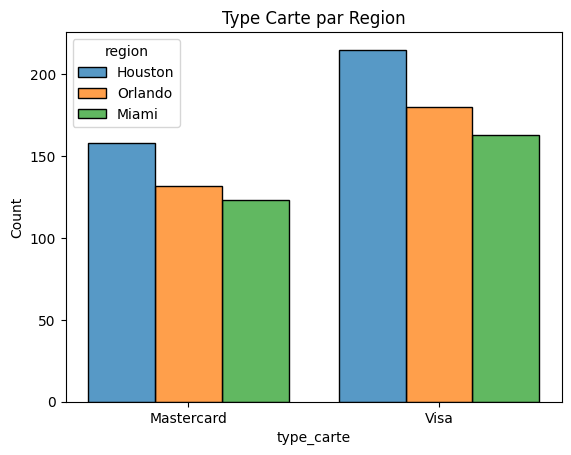

In [32]:
# histogram de la colonne type_carte par region et genre
sns.histplot(data=data, x='type_carte', hue='region', multiple='dodge', shrink=0.8)
plt.title('Type Carte par Region')
plt.show()

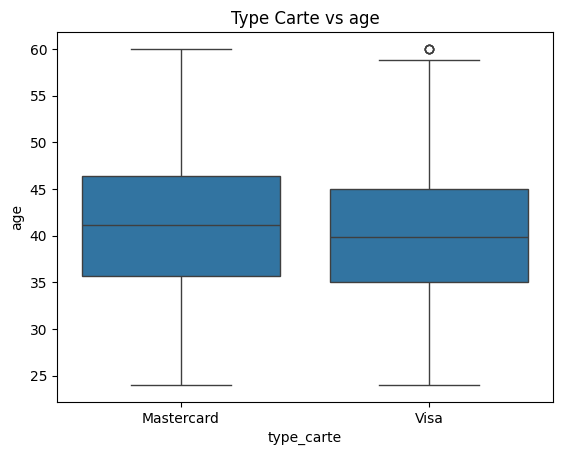

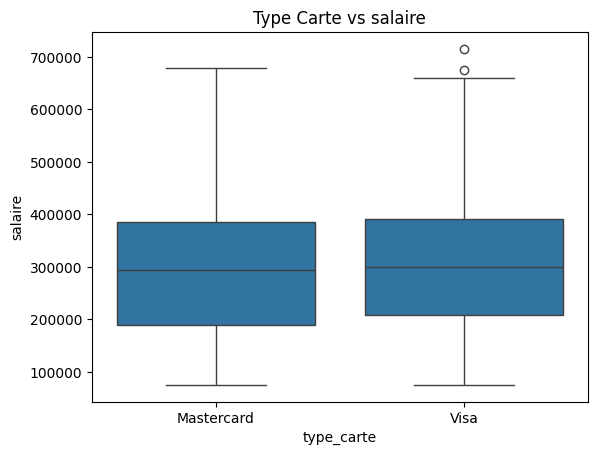

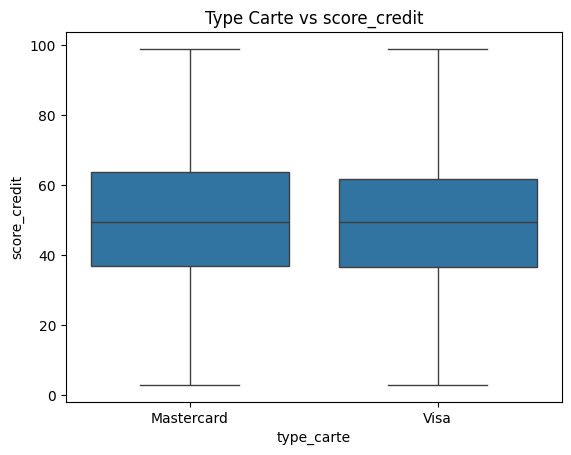

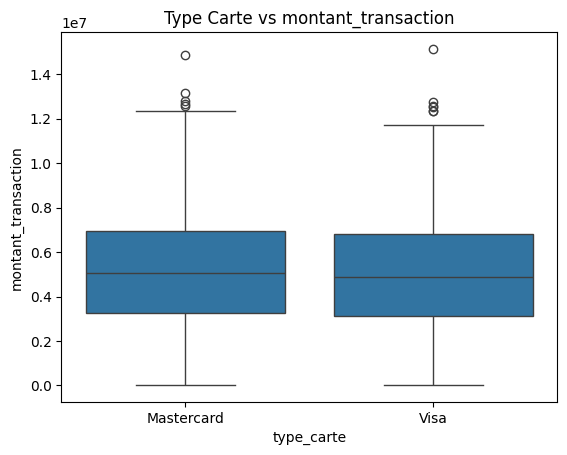

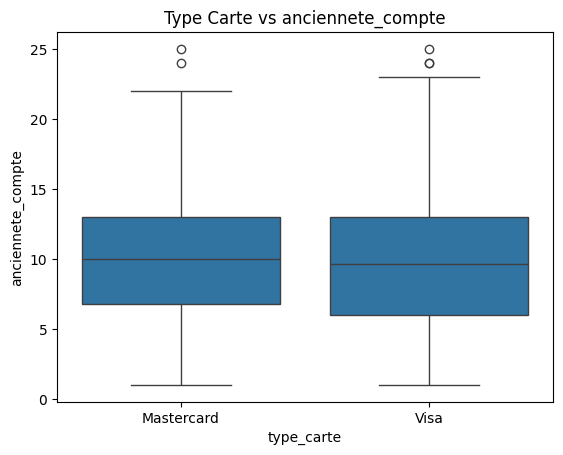

In [33]:
# control de la relation entre type_carte et les autres colonnes
for i in data.select_dtypes(include=[np.number]).columns.drop('fraude'):
    if i != 'type_carte':
        sns.boxplot(x=data['type_carte'], y=data[i])
        plt.title(f'Type Carte vs {i}')
        plt.show()

In [34]:
# pas de liens significatifs entre type_carte et les autres colonnes, remplacement des donnees manquantes par la valeur la plus frequente (meme chose pour region et genre)
data.loc[:, 'type_carte'] = data['type_carte'].fillna(data['type_carte'].mode()[0])
data.loc[:, 'region'] = data['region'].fillna(data['region'].mode()[0])
data.loc[:, 'genre'] = data['genre'].fillna(data['genre'].mode()[0])

In [35]:
# retrait des donnees manquantes sur le colonnes fraude ( target : pour eviter les erreurs de classification)
data = data.dropna(subset=['fraude'])

In [36]:
data.isna().sum()

age                    0
salaire                0
score_credit           0
montant_transaction    0
anciennete_compte      0
type_carte             0
region                 0
genre                  0
fraude                 0
dtype: int64

## Gestion des outlayers

In [37]:
# Vue la faible quantite des outlayers sur l'ensemble de donnees, rammener tous les outlayers au 95eme percentile
for i in data.select_dtypes(include=[np.number]).columns.drop('fraude'):
    upper_limit = data[i].quantile(0.95)
    data[i] = np.where(data[i] > upper_limit, upper_limit, data[i])

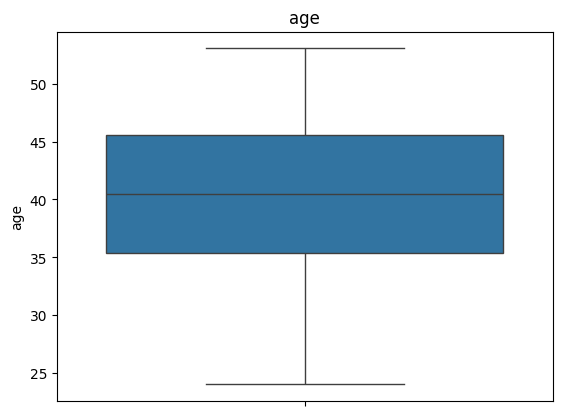

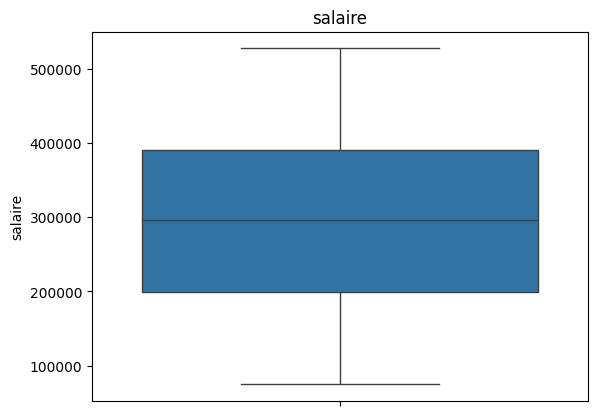

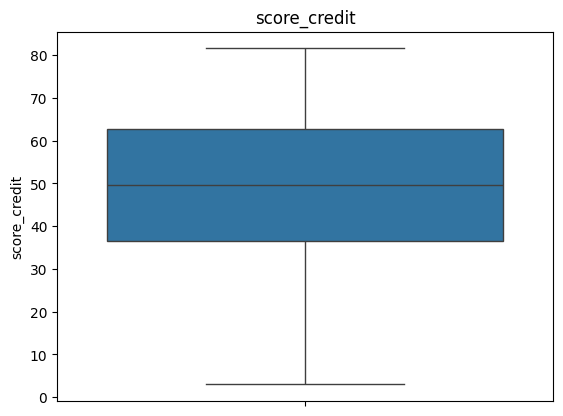

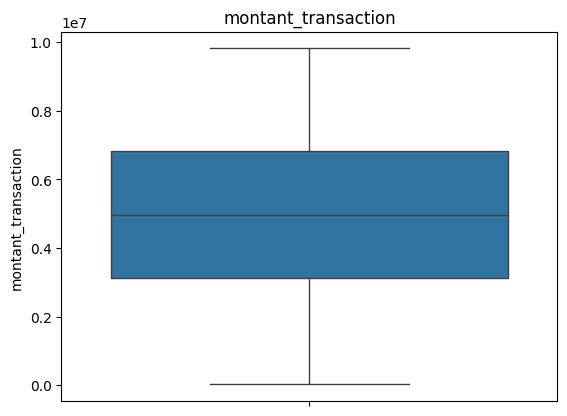

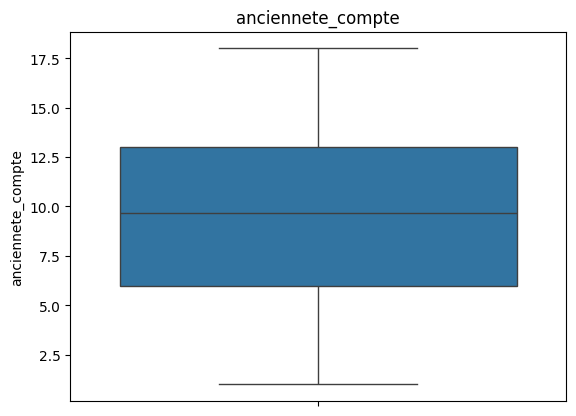

In [38]:
# visualisation des outlayers apres traitement
for i in data.select_dtypes(include=[np.number]).columns.drop('fraude'):
    sns.boxplot(data[i])
    plt.title(i)
    plt.show()

## gestion des correlations

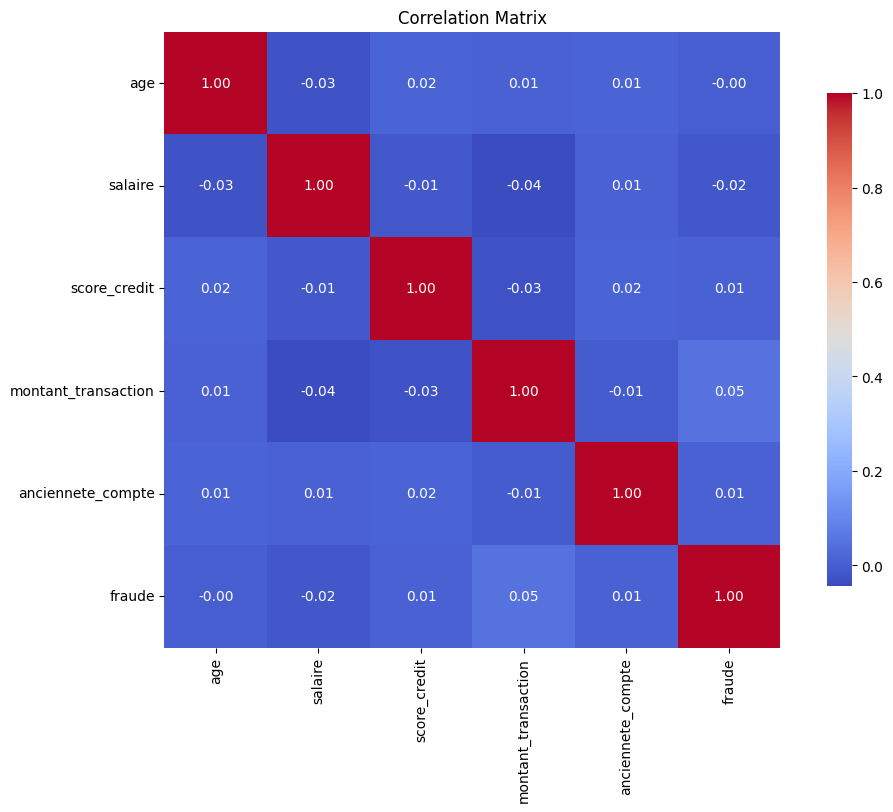

In [39]:
# control des correlations entre les colonnes numeriques
# retirer les colonnees non numeriques
numeric_data = data.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, fmt='.2f', cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Matrix')
plt.show()

## gestion des colonnees categorielles

In [40]:
# cas de la colonne genre, type_carte (label encoding)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data['genre'] = label_encoder.fit_transform(data['genre'])
data['type_carte'] = label_encoder.fit_transform(data['type_carte'])

In [41]:
data.genre.value_counts()

genre
0    498
1    475
Name: count, dtype: int64

In [42]:
data.type_carte.value_counts()

type_carte
1    570
0    403
Name: count, dtype: int64

In [43]:
# cas de la colonne region (frequency encoding)
region_counts = data['region'].value_counts()
region_mapping = {region: i for i, region in enumerate(region_counts.index)}
data['region'] = data['region'].map(region_mapping)

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 973 entries, 0 to 1019
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  973 non-null    float64
 1   salaire              973 non-null    float64
 2   score_credit         973 non-null    float64
 3   montant_transaction  973 non-null    float64
 4   anciennete_compte    973 non-null    float64
 5   type_carte           973 non-null    int64  
 6   region               973 non-null    int64  
 7   genre                973 non-null    int64  
 8   fraude               973 non-null    float64
dtypes: float64(6), int64(3)
memory usage: 76.0 KB


In [45]:
# control des colonnes apres traitement
data.describe()

,age,salaire,score_credit,montant_transaction,anciennete_compte,type_carte,region,genre,fraude
count,973.000000,973.000000,973.000000,9.730000e+02,973.000000,973.000000,973.000000,973.000000,973.000000
mean,40.285541,294845.471445,49.224184,4.985627e+06,9.581830,0.585817,0.898253,0.488181,0.046249
std,7.421420,129326.848934,18.404074,2.645437e+06,4.512227,0.492834,0.822101,0.500117,0.210131
min,24.000000,75000.000000,3.000000,2.500000e+04,1.000000,0.000000,0.000000,0.000000,0.000000
25%,35.368126,198969.052815,36.459776,3.129209e+06,6.000000,0.000000,0.000000,0.000000,0.000000
50%,40.436815,295579.560933,49.568967,4.965177e+06,9.672396,1.000000,1.000000,0.000000,0.000000
75%,45.557353,390614.613953,62.704911,6.828530e+06,13.000000,1.000000,2.000000,1.000000,0.000000
max,53.077195,527204.351874,81.571673,9.812880e+06,18.000000,1.000000,2.000000,1.000000,1.000000


In [46]:
for i in data.columns:
    print(i)
    print(dict(data[i].value_counts()))
# le target du jeu de donnees est tres desequilibrer (utilisation de re-echantillonnage pour l'entrainement du modele .")

age
{53.077195440108575: 49, 24.0: 20, 40.4368149689926: 17, 35.11199100728297: 1, 41.93656536230374: 1, 33.220208875479486: 1, 34.22744734127976: 1, 37.24994784391912: 1, 50.17519636339155: 1, 31.47453841744347: 1, 29.084233171061754: 1, 31.798247314100536: 1, 43.29086104921152: 1, 26.221944528339847: 1, 34.52010256685002: 1, 38.40749956992104: 1, 32.96285059559008: 1, 46.34168814186932: 1, 36.16028285830233: 1, 40.060481443153066: 1, 37.41188042572434: 1, 32.87651397645871: 1, 43.897745557043415: 1, 31.965297389648747: 1, 43.48758103772378: 1, 46.53973701358698: 1, 44.45926845480948: 1, 30.77034941095709: 1, 42.1213113819727: 1, 29.408391326243496: 1, 28.805262673209832: 1, 38.5826550790819: 1, 47.84003388907115: 1, 46.87704629483877: 1, 40.300424613284505: 1, 29.377610612164556: 1, 45.92813561069159: 1, 42.13980311118449: 1, 38.35328112062925: 1, 52.80078277456383: 1, 42.66208382909608: 1, 51.018680236226736: 1, 38.13433201434885: 1, 41.8456939925997: 1, 45.0577305122548: 1, 35.7487

In [47]:
# reequilibrage de donnees avec la methode SMOTE
from imblearn.over_sampling import SMOTE
X = data.drop('fraude', axis=1)
y = data['fraude']

In [48]:
smote = SMOTE(sampling_strategy=0.8, random_state=42)  # 0.25 = 20/80
X_resampled, y_resampled = smote.fit_resample(X, y)
data_resampled = pd.DataFrame(X_resampled, columns=X.columns)
data_resampled['fraude'] = y_resampled

In [50]:
# sauvegarde du jeu de donnees nettoye
data_resampled.to_csv('data/data_nettoye.csv', index=False)